## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
import seaborn as sns 

## Data Cleaning

### Read in 'Showerthoughts' dataset

In [3]:
df_showerthoughts = pd.read_csv('./data/showerthoughts.csv')
df_showerthoughts.head()

,Unnamed: 0,title,text,auth,time
0,0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371
1,1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311
2,2,A good book will always be new.,NaN,agreatday248,1643317210
3,3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183
4,4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126


In [4]:
# # Drop 'Unnamed: 0' column

# df_showerthoughts = df_showerthoughts.drop(columns='Unnamed: 0')

In [5]:
# df_showerthoughts.head()

,title,text,auth,time
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311
2,A good book will always be new.,NaN,agreatday248,1643317210
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126


### Duplicated values in Showerthoughts

In [6]:
# Duplicated values in Showerthoughts dataframe

df_showerthoughts.duplicated().value_counts()

False    9814
True       75
dtype: int64

In [7]:
# Duplicated values in Showerthoughts 'title' column
# 'title' contains the majority of the text in Showerthoughts posts

df_showerthoughts['title'].duplicated().value_counts()

False    9511
True      378
Name: title, dtype: int64

In [8]:
# Drop all dataframe rows with duplicated titles

df_showerthoughts.drop_duplicates(subset='title', keep='first').duplicated().value_counts()

False    9511
dtype: int64

In [9]:
df_showerthoughts = df_showerthoughts.drop_duplicates(subset='title', keep='first')

In [10]:
# Check that duplicate rows have been dropped

df_showerthoughts.duplicated().value_counts()

False    9511
dtype: int64

### Add subreddit identification column to 'Showerthoughts'

In [11]:
df_showerthoughts['subreddit'] = np.full_like(df_showerthoughts['title'], 'showerthoughts')

In [12]:
df_showerthoughts.head()

,title,text,auth,time,subreddit
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts


### Read in 'CrazyIdeas' dataset

In [13]:
df_crazyideas = pd.read_csv('./data/crazyideas.csv')
df_crazyideas.head()

,Unnamed: 0,title,text,auth,time
0,0,Instead of letting cats laze around all day we...,NaN,afungalmirror,1643317263
1,1,The US federal government could pay to have el...,"This would help combat ""range anxiety"" by redu...",Comprehensive-Ad3963,1643317089
2,2,Do a parentage test and check the wedding date...,NaN,lurebat,1643315951
3,3,"Be compassionate to everyone, including mods, ...",NaN,StringRingdotcom,1643315114
4,4,"Every four years, have every football (soccer)...",Do it the years when there is no world cup,bufarreti,1643313995


In [14]:
# # Drop 'Unnamed: 0' column

# df_crazyideas = df_crazyideas.drop(columns='Unnamed: 0')

In [15]:
# df_crazyideas.head()

,title,text,auth,time
0,Instead of letting cats laze around all day we...,NaN,afungalmirror,1643317263
1,The US federal government could pay to have el...,"This would help combat ""range anxiety"" by redu...",Comprehensive-Ad3963,1643317089
2,Do a parentage test and check the wedding date...,NaN,lurebat,1643315951
3,"Be compassionate to everyone, including mods, ...",NaN,StringRingdotcom,1643315114
4,"Every four years, have every football (soccer)...",Do it the years when there is no world cup,bufarreti,1643313995


### Duplicated values in 'CrazyIdeas'

In [16]:
# Duplicated values in CrazyIdeas dataframe

df_crazyideas.duplicated().value_counts()

False    9978
dtype: int64

In [17]:
# Duplicated values in CrazyIdeas 'title' column
# 'title' contains the majority of the text in CrazyIdeas posts

df_crazyideas['title'].duplicated().value_counts()

False    9887
True       91
Name: title, dtype: int64

In [18]:
# Drop all dataframe rows with duplicated titles

df_crazyideas.drop_duplicates(subset='title', keep='first').duplicated().value_counts()

False    9887
dtype: int64

In [19]:
df_crazyideas = df_crazyideas.drop_duplicates(subset='title', keep='first')

In [20]:
# Check that duplicated rows have been dropped

df_crazyideas.duplicated().value_counts()

False    9887
dtype: int64

### Add subreddit identification column to CrazyIdeas

In [21]:
df_crazyideas['subreddit'] = np.full_like(df_crazyideas['title'], 'crazyideas')

In [22]:
df_crazyideas.head()

,title,text,auth,time,subreddit
0,Instead of letting cats laze around all day we...,NaN,afungalmirror,1643317263,crazyideas
1,The US federal government could pay to have el...,"This would help combat ""range anxiety"" by redu...",Comprehensive-Ad3963,1643317089,crazyideas
2,Do a parentage test and check the wedding date...,NaN,lurebat,1643315951,crazyideas
3,"Be compassionate to everyone, including mods, ...",NaN,StringRingdotcom,1643315114,crazyideas
4,"Every four years, have every football (soccer)...",Do it the years when there is no world cup,bufarreti,1643313995,crazyideas


### Combine Showerthoughts and CrazyIdeas datasets

In [23]:
df_showerthoughts.head()

,title,text,auth,time,subreddit
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts


In [24]:
df_crazyideas.head()

,title,text,auth,time,subreddit
0,Instead of letting cats laze around all day we...,NaN,afungalmirror,1643317263,crazyideas
1,The US federal government could pay to have el...,"This would help combat ""range anxiety"" by redu...",Comprehensive-Ad3963,1643317089,crazyideas
2,Do a parentage test and check the wedding date...,NaN,lurebat,1643315951,crazyideas
3,"Be compassionate to everyone, including mods, ...",NaN,StringRingdotcom,1643315114,crazyideas
4,"Every four years, have every football (soccer)...",Do it the years when there is no world cup,bufarreti,1643313995,crazyideas


In [25]:
df_subreddits = pd.concat([df_showerthoughts, df_crazyideas])

In [26]:
df_subreddits.head()

,title,text,auth,time,subreddit
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts


In [27]:
df_showerthoughts.shape

(9511, 5)

In [28]:
df_crazyideas.shape

(9887, 5)

In [29]:
df_subreddits.shape

(19398, 5)

In [30]:
df_subreddits['subreddit'].value_counts()

crazyideas        9887
showerthoughts    9511
Name: subreddit, dtype: int64

### Missing Values

In [31]:
# Missing values in subreddits dataframe
# All of missing values are in text column. This is due to the fact that the majority of the post text is in the 'title' section in both subreddits

df_subreddits.isna().sum()

title            0
text         15117
auth             0
time             0
subreddit        0
dtype: int64

In [32]:
# Examine 'text' rows with mssing values

df_subreddits[df_subreddits['text'].isna()==True][['text']].sort_values(by='text')

,text
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9970,NaN
9972,NaN
9973,NaN
9975,NaN


In [33]:
# Replace missing values in 'text' column with blank space so that 'title' and 'text' columns can be combined for each row to show full text of post

df_subreddits.fillna('', inplace=True)

In [34]:
df_subreddits.head()

,title,text,auth,time,subreddit
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts


In [35]:
df_subreddits.isna().sum()

title        0
text         0
auth         0
time         0
subreddit    0
dtype: int64

### Combine columns (title & text) to get full text of each reddit post

In [36]:
# Create new column for full text of each post

df_subreddits['full_text'] = df_subreddits['title'] + df_subreddits['text']

In [37]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ..."
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts,A good book will always be new.
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,..."
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...


## EDA

### Letter counts of posts

In [38]:
#Create list of letter count of each post in df_subreddits

text_letter_cts = []
for text in df_subreddits['full_text']:
    text_letter_cts.append(len(text))

In [39]:
#Add list to df_subreddit as new column 'letter_count'

df_subreddits['letter_count'] = text_letter_cts

In [40]:
#Check that column has been added

df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts,A good book will always be new.,31
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118


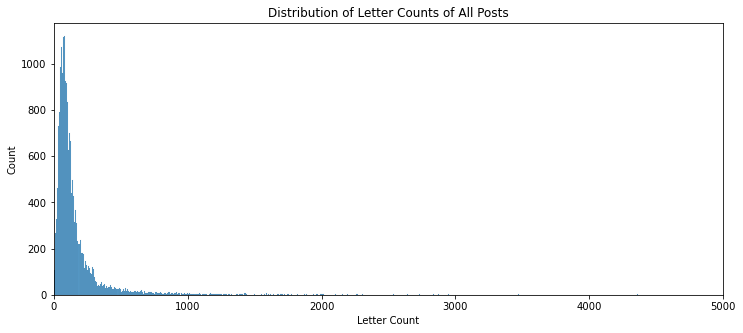

In [41]:
#Plot distribution of letter counts for all posts in df_subreddit

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits['letter_count'])
plt.xlim(0,5000)
plt.title('Distribution of Letter Counts of All Posts')
plt.xlabel('Letter Count');

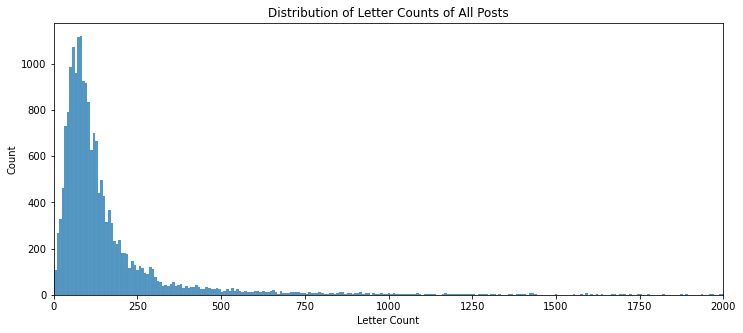

In [42]:
#Reconfigure axis of figure to better visualize distribution of letter counts for all posts
# This plot shows a very wide total distribution of letetr counts, with the vast amjoirty of posts in a smaller range between 1 and 250 letters

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits['letter_count'])
plt.xlim(0,2000)
plt.title('Distribution of Letter Counts of All Posts')
plt.xlabel('Letter Count');

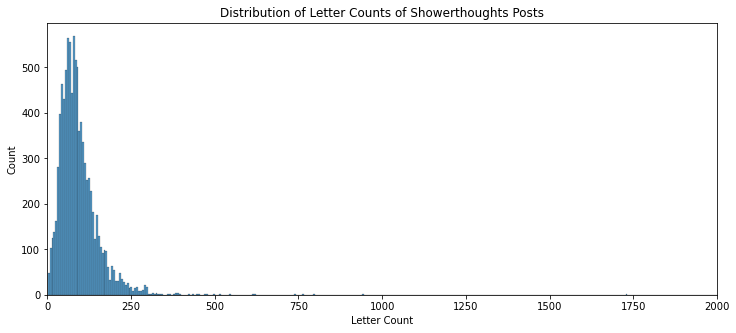

In [43]:
#Plot distribution of letter counts for all 'Showerthoughts' posts in df_subreddits
# This plot shows a similar distribution of letter counts to that of all posts, but with a less wide range, with every posts with above 500 letters. The majority of posts seem to 
# have a letter count in the range of 1 to 250, with a maximum around 125 letters

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits[df_subreddits['subreddit']=='showerthoughts']['letter_count'])
plt.xlim(0,2000)
plt.title('Distribution of Letter Counts of Showerthoughts Posts')
plt.xlabel('Letter Count');

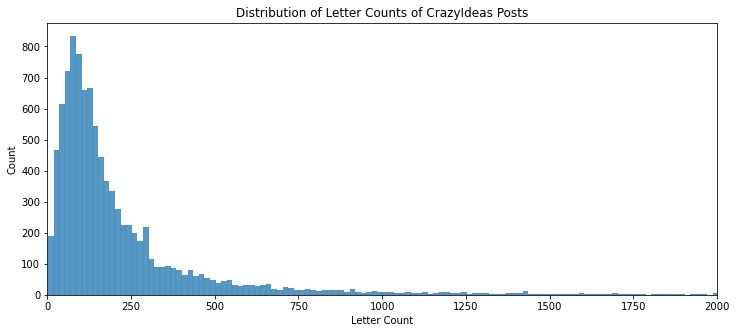

In [44]:
#Plot distribution of letter counts for all 'CrazyIdeas' posts in df_subreddits
# This plot shows a distribution of letter counts with much wider range than that of Showerthoughts posts only, with the majority of posts still falling around 125 letters

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits[df_subreddits['subreddit']=='crazyideas']['letter_count'])
plt.xlim(0,2000)
plt.title('Distribution of Letter Counts of CrazyIdeas Posts')
plt.xlabel('Letter Count');

### Word counts of posts

In [45]:
#Create list of word count of each post in df_subreddits

text_word_cts = []
for text in df_subreddits['full_text']:
    words = text.split(' ')
    text_word_cts.append(len(words))

In [46]:
#Add list to df_subreddit as new column 'word_count'

df_subreddits['word_count'] = text_word_cts

In [47]:
#Check that column has been added

df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22


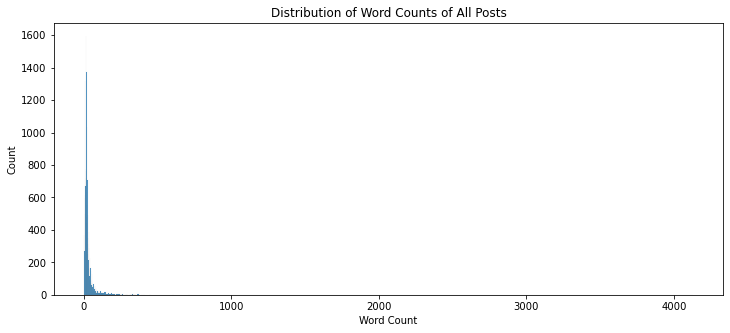

In [48]:
#Plot distribution of word counts for all posts in df_subreddit

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits['word_count'])
plt.title('Distribution of Word Counts of All Posts')
plt.xlabel('Word Count');

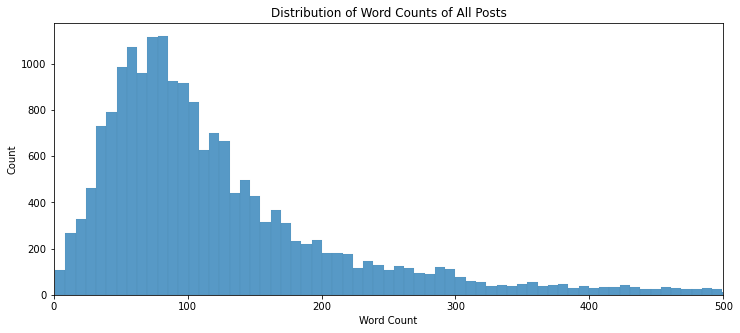

In [49]:
#Reconfigure axis of figure to better visualize distribution of letter counts for all posts

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits['letter_count'])
plt.xlim(0,500)
plt.title('Distribution of Word Counts of All Posts')
plt.xlabel('Word Count');

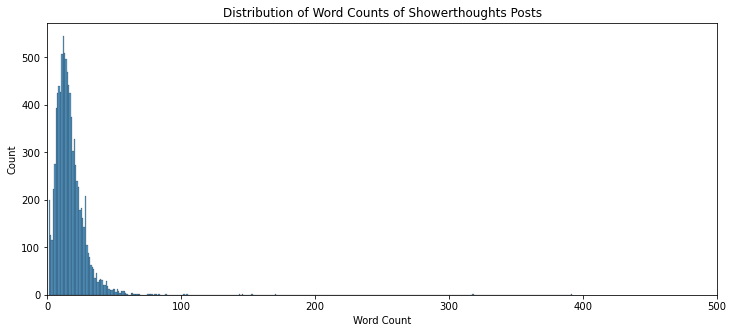

In [50]:
#Plot distribution of word counts for all 'Showerthoughts' posts in df_subreddits

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits[df_subreddits['subreddit']=='showerthoughts']['word_count'])
plt.xlim(0,500)
plt.title('Distribution of Word Counts of Showerthoughts Posts')
plt.xlabel('Word Count');

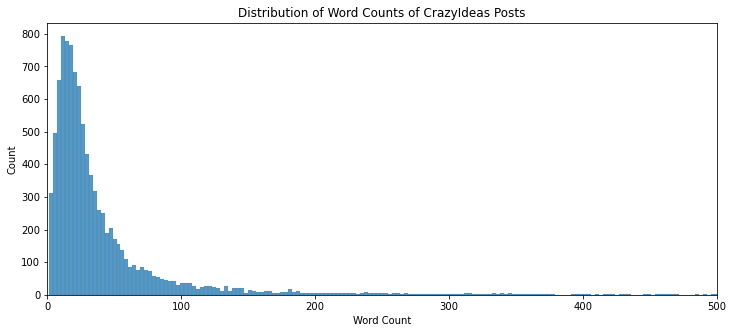

In [51]:
#Plot distribution of word counts for all 'Showerthoughts' posts in df_subreddits

plt.figure(figsize=(12,5))
sns.histplot(df_subreddits[df_subreddits['subreddit']=='crazyideas']['word_count'])
plt.xlim(0,500)
plt.title('Distribution of Word Counts of CrazyIdeas Posts')
plt.xlabel('Word Count');

### Subreddits dataframe correlations

In [52]:
# Create encoded 'subreddit' column to calculate correlations with other numerical features

df_subreddits['subreddit_code'] = df_subreddits['subreddit'].map(lambda x: 0 if x=='showerthoughts' else 1)

In [53]:
#Check that encoding column has been added

df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


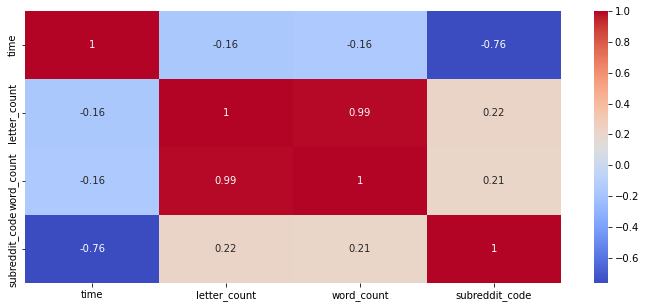

In [54]:
# Subreddits correlation heatmap
# Word count and Lettr count both have mild correlation with subreddit
# Time posted has a relatively high negative correlation with subreddit - this may be due to the time at which the data for each subreddit was collected

plt.figure(figsize=(12,5))
sns.heatmap(df_subreddits.corr(), annot=True, cmap='coolwarm');

### Analysis of lengths of posts

In [55]:
# Posts with shortest letter counts
# majority of posts with shortest letter counts are from Showerthoughts
shortest_letter_ct = df_subreddits.sort_values(by='letter_count')[:10]
shortest_letter_ct

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
6265,?,,Misfits_Hub_,1642931586,showerthoughts,?,1,1,0
2565,e,,Jamie_Rusell,1643162793,showerthoughts,e,1,1,0
759,.,,Yourmom7300,1643267152,showerthoughts,.,1,1,0
9015,Y,,Chilaquil8,1642788706,showerthoughts,Y,1,1,0
4552,Hm,,slurpeequeen3,1632814887,crazyideas,Hm,2,1,1
4516,hi,,liamiscool420,1643041024,showerthoughts,hi,2,1,0
2735,🤷🏻,,Chemical-Passage-715,1643155129,showerthoughts,🤷🏻,2,1,0
7749,BC,,brightlights55,1642853112,showerthoughts,BC,2,1,0
1322,sda,,Emmanuel211ghd1,1640294089,crazyideas,sda,3,1,1
955,...,,Malo______,1643255136,showerthoughts,...,3,1,0


In [56]:
#Posts with longest letter counts
# 10 posts with longest letter counts are from CrazyIdeas

longest_letter_ct = df_subreddits.sort_values(by='letter_count')[-10:]
longest_letter_ct

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
470,City cash bonus for healthy choices &amp; good...,"Remedial social services such as policing, det...",benny-the-rennie,1642273791,crazyideas,City cash bonus for healthy choices &amp; good...,5984,951,1
2124,"We're not living in an ancestor simulation, we...","Apologies in advance for the long post, so the...",tigrenus,1638467975,crazyideas,"We're not living in an ancestor simulation, we...",6750,1102,1
5834,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,FartBlat,1629861227,crazyideas,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,6925,5,1
2242,I don't want to pay welfare,Greed? Anything but greed. I feel uncomfortabl...,SugarMaleficent6721,1638251072,crazyideas,I don't want to pay welfareGreed? Anything but...,7041,1273,1
6843,All is fair in love and war,I've recently moved into a new house share wit...,SaffronCourgette,1627662087,crazyideas,All is fair in love and warI've recently moved...,7968,1526,1
7220,What if video game licenses were sold (kind of...,**With my probably elementary school level und...,Cronatsu,1626807344,crazyideas,What if video game licenses were sold (kind of...,9039,1462,1
3512,Human genetic modification is ethical*. Bannin...,\*if done correctly (keep reading?). Note: Thi...,_re_cursion_,1635326839,crazyideas,Human genetic modification is ethical*. Bannin...,9583,1682,1
734,"To prevent poaching of elephants, let's give t...","So, poaching of wild elephants is a perennial ...",isleepinahammock,1641628048,crazyideas,"To prevent poaching of elephants, let's give t...",9959,1657,1
7899,"Begone sad joker...wait, what?!.","Here, we keep it short and simple...where we...",AlexandrosTsolis,1625192902,crazyideas,"Begone sad joker...wait, what?!. Here, we kee...",10460,1690,1
7584,"Answers to 42 (Hitchhiker’s Guide), 666 (beast...","Hi everyone! So, I consider this my Part 2, wh...",trebeck_x,1625923073,crazyideas,"Answers to 42 (Hitchhiker’s Guide), 666 (beast...",22586,4128,1


In [57]:
#Posts with shortest word counts
# majority of posts with shortest word counts are from Showerthoughts

shortest_word_ct = df_subreddits.sort_values(by='word_count')[:10]
shortest_word_ct

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
3555,Love?,,Tellingkile,1643101731,showerthoughts,Love?,5,1,0
8301,https://www.youtube.com/watch?v=ozInmALgNuI&am...,,MajorRazor4,1624339691,crazyideas,https://www.youtube.com/watch?v=ozInmALgNuI&am...,53,1,1
3448,http://www.xvideos.com/video63871929/asian_nym...,,ClarkesBoutaine,1635475828,crazyideas,http://www.xvideos.com/video63871929/asian_nym...,106,1,1
6401,FOMO,,Dry-Communication996,1642921695,showerthoughts,FOMO,4,1,0
1492,Counting,,EveAlleycat,1643225475,showerthoughts,Counting,8,1,0
7847,thinking,,youwillneverknow96,1642843190,showerthoughts,thinking,8,1,0
6079,打败影子总是一场零和游戏,,fangxingsanren,1642944499,showerthoughts,打败影子总是一场零和游戏,12,1,0
2726,https://www.xvideos.com/video66502791/papai_e_...,,ClarkesBoutaine,1637108718,crazyideas,https://www.xvideos.com/video66502791/papai_e_...,119,1,1
4072,What??,,worthalot320,1643063862,showerthoughts,What??,6,1,0
2524,"""fine""",,999maya,1643165162,showerthoughts,"""fine""",6,1,0


In [58]:
#Posts with longest word counts
# majority of posts with longest word counts are from CrazyIdeas

longest_word_ct = df_subreddits.sort_values(by='word_count')[-10:]
longest_word_ct

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
8332,Would this charity work in the USA or not ?,In the near future just before my son joins Un...,BigPapiPR83,1624282825,crazyideas,Would this charity work in the USA or not ?In ...,5780,1035,1
7560,A brave new world part 3,"Hello, my name is Sylar De Luminous, and this ...",1925120118,1625969570,crazyideas,"A brave new world part 3Hello, my name is Syla...",5717,1056,1
2124,"We're not living in an ancestor simulation, we...","Apologies in advance for the long post, so the...",tigrenus,1638467975,crazyideas,"We're not living in an ancestor simulation, we...",6750,1102,1
2242,I don't want to pay welfare,Greed? Anything but greed. I feel uncomfortabl...,SugarMaleficent6721,1638251072,crazyideas,I don't want to pay welfareGreed? Anything but...,7041,1273,1
7220,What if video game licenses were sold (kind of...,**With my probably elementary school level und...,Cronatsu,1626807344,crazyideas,What if video game licenses were sold (kind of...,9039,1462,1
6843,All is fair in love and war,I've recently moved into a new house share wit...,SaffronCourgette,1627662087,crazyideas,All is fair in love and warI've recently moved...,7968,1526,1
734,"To prevent poaching of elephants, let's give t...","So, poaching of wild elephants is a perennial ...",isleepinahammock,1641628048,crazyideas,"To prevent poaching of elephants, let's give t...",9959,1657,1
3512,Human genetic modification is ethical*. Bannin...,\*if done correctly (keep reading?). Note: Thi...,_re_cursion_,1635326839,crazyideas,Human genetic modification is ethical*. Bannin...,9583,1682,1
7899,"Begone sad joker...wait, what?!.","Here, we keep it short and simple...where we...",AlexandrosTsolis,1625192902,crazyideas,"Begone sad joker...wait, what?!. Here, we kee...",10460,1690,1
7584,"Answers to 42 (Hitchhiker’s Guide), 666 (beast...","Hi everyone! So, I consider this my Part 2, wh...",trebeck_x,1625923073,crazyideas,"Answers to 42 (Hitchhiker’s Guide), 666 (beast...",22586,4128,1


## Export cleaned data to csv

In [59]:
#Check cleaned dataframe to be exported to csv file

df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


In [60]:
#Export to csv

df_subreddits.to_csv('./data/subreddits.csv', index=False)